このガイドは [10 Minute Guide to Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html) を翻訳し、コードをより実行しやすいようにjupyter notebookのカーネルとしたものです。このガイドは、いままでPandasを使ったことのないビギナー向けのものです。Pandasがいかにパワフルであるかを示す多くのサンプルコードが記載されています。ぜひ、Pandasを楽しんでください。

### これはpandas初心者向けの簡単な紹介です。[クックブック](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)でもっと詳細なレシピを見ることができます。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# オブジェクトの作成
データ構造のイントロダクション　リストからシリーズを作成します。デフォルトで整数のインデックスが付加されます。

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

numpyの配列からdatetimeのインデックスとラベル付のコラムで構成される[データフレーム](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame)を作成します。 

In [3]:
dates = pd.date_range('20141101', periods=6)
dates

DatetimeIndex(['2014-11-01', '2014-11-02', '2014-11-03', '2014-11-04',
               '2014-11-05', '2014-11-06'],
              dtype='datetime64[ns]', freq='D')

In [103]:
df = pd.DataFrame(np.random.randn(6,4), index=dates,columns=['one','two','three','four'])
df

,one,two,three,four
2014-11-01,-1.013910,0.645651,-0.471663,1.598430
2014-11-02,-0.167958,0.569376,0.042177,-1.073518
2014-11-03,0.620331,-2.125627,-1.148625,-0.860663
2014-11-04,-0.648284,-2.651192,0.211608,0.408859
2014-11-05,-0.544463,-0.098360,0.172779,0.771743
2014-11-06,0.096059,2.273602,-1.125638,0.490312


辞書型のオブジェクトで、一連の連続した値に変換できる要素を持つものから、データフレームを作成します。

In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
   ....:                      'B' : pd.Timestamp('20130102'),
   ....:                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
   ....:                      'D' : np.array([3] * 4,dtype='int32'),
   ....:                      'E' : pd.Categorical(["test","train","test","train"]),
   ....:                      'F' : 'foo' })
   ....: 
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


それぞれの列の [dtypes](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)を確認しましょう。

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


# データを確認する
参考 [Basics section](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics)

データフレームの最初と最後の部分を確認します。

In [7]:
df.head()

,one,two,three,four
2014-11-01,-1.600769,0.221099,0.021585,-1.401094
2014-11-02,1.056213,-0.263292,1.766088,-0.814938
2014-11-03,1.058138,1.649387,1.075582,0.431538
2014-11-04,0.642886,0.020734,0.737457,0.276887
2014-11-05,0.021690,0.057333,0.998961,-0.360318


In [8]:
df.tail(3)

,one,two,three,four
2014-11-04,0.642886,0.020734,0.737457,0.276887
2014-11-05,0.021690,0.057333,0.998961,-0.360318
2014-11-06,-0.468473,0.108894,0.412678,0.364218


インデックスとコラム名及び関連するnumpyデータを表示します。

In [9]:
df.index

DatetimeIndex(['2014-11-01', '2014-11-02', '2014-11-03', '2014-11-04',
               '2014-11-05', '2014-11-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['one', 'two', 'three', 'four'], dtype='object')

In [11]:
df.values

array([[-1.60076889,  0.22109854,  0.02158489, -1.40109415],
       [ 1.05621301, -0.2632922 ,  1.76608796, -0.81493848],
       [ 1.05813816,  1.64938709,  1.07558217,  0.43153807],
       [ 0.64288567,  0.02073441,  0.7374565 ,  0.27688726],
       [ 0.02168958,  0.05733348,  0.9989606 , -0.36031822],
       [-0.46847296,  0.10889358,  0.4126783 ,  0.36421791]])

データの要約統計量を表示します。

In [12]:
df.describe()

,one,two,three,four
count,6.000000,6.000000,6.000000,6.000000
mean,0.118281,0.299026,0.835392,-0.250618
std,1.034118,0.680847,0.600200,0.745078
min,-1.600769,-0.263292,0.021585,-1.401094
25%,-0.345932,0.029884,0.493873,-0.701283
50%,0.332288,0.083114,0.868209,-0.041715
75%,0.952881,0.193047,1.056427,0.342385
max,1.058138,1.649387,1.766088,0.431538


データを転置します。

In [13]:
df.T

,2014-11-01 00:00:00,2014-11-02 00:00:00,2014-11-03 00:00:00,2014-11-04 00:00:00,2014-11-05 00:00:00,2014-11-06 00:00:00
one,-1.600769,1.056213,1.058138,0.642886,0.021690,-0.468473
two,0.221099,-0.263292,1.649387,0.020734,0.057333,0.108894
three,0.021585,1.766088,1.075582,0.737457,0.998961,0.412678
four,-1.401094,-0.814938,0.431538,0.276887,-0.360318,0.364218


軸によりソートします（この場合は、列名がアルファ別途の逆順となるようにソートします。）

In [14]:
df.sort_index(axis=1, ascending=False)

,two,three,one,four
2014-11-01,0.221099,0.021585,-1.600769,-1.401094
2014-11-02,-0.263292,1.766088,1.056213,-0.814938
2014-11-03,1.649387,1.075582,1.058138,0.431538
2014-11-04,0.020734,0.737457,0.642886,0.276887
2014-11-05,0.057333,0.998961,0.021690,-0.360318
2014-11-06,0.108894,0.412678,-0.468473,0.364218


値によりソートします。

In [15]:
df.sort_values(by='two')

,one,two,three,four
2014-11-02,1.056213,-0.263292,1.766088,-0.814938
2014-11-04,0.642886,0.020734,0.737457,0.276887
2014-11-05,0.021690,0.057333,0.998961,-0.360318
2014-11-06,-0.468473,0.108894,0.412678,0.364218
2014-11-01,-1.600769,0.221099,0.021585,-1.401094
2014-11-03,1.058138,1.649387,1.075582,0.431538


# 選択

PythonやNumpyでの値の選択や設定の表現方法は、直感的であり、ちょっとした作業においては扱いやすい方法ですが、製品用のコードでは、.at, .iat, .loc, .iloc あるいは .ix.　といった最適化されたpandasのデータアクセス用のメソッドを使うことをおすすめします。

参考 indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

## Getting

１つの列を選択すると、シリーズを得ることができます。これは、df.oneとするのと同じです。

In [104]:
df['one']

2014-11-01   -1.013910
2014-11-02   -0.167958
2014-11-03    0.620331
2014-11-04   -0.648284
2014-11-05   -0.544463
2014-11-06    0.096059
Freq: D, Name: one, dtype: float64

In [105]:
df.one

2014-11-01   -1.013910
2014-11-02   -0.167958
2014-11-03    0.620331
2014-11-04   -0.648284
2014-11-05   -0.544463
2014-11-06    0.096059
Freq: D, Name: one, dtype: float64

 []を使って選択することにより、行をスライスできます。

In [18]:
df[0:3]

,one,two,three,four
2014-11-01,-1.600769,0.221099,0.021585,-1.401094
2014-11-02,1.056213,-0.263292,1.766088,-0.814938
2014-11-03,1.058138,1.649387,1.075582,0.431538


In [106]:
df['20141102':'20141104']

,one,two,three,four
2014-11-02,-0.167958,0.569376,0.042177,-1.073518
2014-11-03,0.620331,-2.125627,-1.148625,-0.860663
2014-11-04,-0.648284,-2.651192,0.211608,0.408859


## ラベルを使った選択

参考 [ Selection by Label](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)

ラベルを使ってデータを選択する

In [107]:
df.loc[dates[0]]

one     -1.013910
two      0.645651
three   -0.471663
four     1.598430
Name: 2014-11-01 00:00:00, dtype: float64

ラベルを使って複数の軸で選択します。

In [21]:
df.loc[:,['one','two']]

,one,two
2014-11-01,-1.600769,0.221099
2014-11-02,1.056213,-0.263292
2014-11-03,1.058138,1.649387
2014-11-04,0.642886,0.020734
2014-11-05,0.021690,0.057333
2014-11-06,-0.468473,0.108894


ラベルを使ってスライスします。始点と終点が共に含まれます。

In [22]:
df.loc['20141102':'20141104',['one','two']]

,one,two
2014-11-02,1.056213,-0.263292
2014-11-03,1.058138,1.649387
2014-11-04,0.642886,0.020734


戻り値のオブジェクトの次元が削減されます。

In [23]:
df.loc['20141102',['one','two']]

one    1.056213
two   -0.263292
Name: 2014-11-02 00:00:00, dtype: float64

スカラーの値を取得します。

In [24]:
df.loc[dates[0],'one']

-1.6007688875678809

スカラー値にすばやくアクセスする方法（前の方法と同じ値をより素早く取得できます。）

In [25]:
df.at[dates[0],'one']

-1.6007688875678809

## ポジションによる選択

参考 [Selection by Position](Selection by Position)

整数を渡して、ポジションにより選択を行います。

In [26]:
df.iloc[3]

one      0.642886
two      0.020734
three    0.737457
four     0.276887
Name: 2014-11-04 00:00:00, dtype: float64

numpy/pythonの整数によるスライスと似た動作をします。

整数からなるリストによるポジションの指定は、numpy/pythonのスタイルに似ています。

In [108]:
df.iloc[[1,2,4],[0,2]]

,one,three
2014-11-02,-0.167958,0.042177
2014-11-03,0.620331,-1.148625
2014-11-05,-0.544463,0.172779


行の範囲を直接指定してスライスします。

In [109]:
df.iloc[1:3,:]

,one,two,three,four
2014-11-02,-0.167958,0.569376,0.042177,-1.073518
2014-11-03,0.620331,-2.125627,-1.148625,-0.860663


コラムの範囲を直接指定してスライスします。

In [29]:
df.iloc[:,1:3]

,two,three
2014-11-01,0.221099,0.021585
2014-11-02,-0.263292,1.766088
2014-11-03,1.649387,1.075582
2014-11-04,0.020734,0.737457
2014-11-05,0.057333,0.998961
2014-11-06,0.108894,0.412678


値を明示的に取得します。

In [111]:
df.iloc[1,1]

0.56937593883029136

スカラー値にすばやくアクセスする方法（前の方法と同等でより素早く取得できます。）

In [114]:
df.iat[0,0]

-1.0139101669449526

## 条件による選択
単一のコラムの値によるデータの選択

In [115]:
df[df.one > 0.5]

,one,two,three,four
2014-11-03,0.620331,-2.125627,-1.148625,-0.860663


データフレームの値が条件に合致するかどうかによる選択

In [116]:
df[df>0]

,one,two,three,four
2014-11-01,NaN,0.645651,NaN,1.598430
2014-11-02,NaN,0.569376,0.042177,NaN
2014-11-03,0.620331,NaN,NaN,NaN
2014-11-04,NaN,NaN,0.211608,0.408859
2014-11-05,NaN,NaN,0.172779,0.771743
2014-11-06,0.096059,2.273602,NaN,0.490312


isin メソッドを使ったフィルターリング

In [118]:
df2 = df.copy()
df2['five'] = ['one', 'one','two','three','four','three']
df2

,one,two,three,four,five
2014-11-01,-1.013910,0.645651,-0.471663,1.598430,one
2014-11-02,-0.167958,0.569376,0.042177,-1.073518,one
2014-11-03,0.620331,-2.125627,-1.148625,-0.860663,two
2014-11-04,-0.648284,-2.651192,0.211608,0.408859,three
2014-11-05,-0.544463,-0.098360,0.172779,0.771743,four
2014-11-06,0.096059,2.273602,-1.125638,0.490312,three


In [119]:
df2[df2['five'].isin(['two','four'])]

,one,two,three,four,five
2014-11-03,0.620331,-2.125627,-1.148625,-0.860663,two
2014-11-05,-0.544463,-0.098360,0.172779,0.771743,four


## 値の設定
新規のコラムのデータはインデックスに従って自動的に配置されます。

In [120]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20141101', periods=6))
s1

2014-11-01    1
2014-11-02    2
2014-11-03    3
2014-11-04    4
2014-11-05    5
2014-11-06    6
Freq: D, dtype: int64

In [121]:
df['six'] = s1
df

,one,two,three,four,six
2014-11-01,-1.013910,0.645651,-0.471663,1.598430,1
2014-11-02,-0.167958,0.569376,0.042177,-1.073518,2
2014-11-03,0.620331,-2.125627,-1.148625,-0.860663,3
2014-11-04,-0.648284,-2.651192,0.211608,0.408859,4
2014-11-05,-0.544463,-0.098360,0.172779,0.771743,5
2014-11-06,0.096059,2.273602,-1.125638,0.490312,6


それぞれの軸のラベルを使ってデータを設定します。

In [38]:
df.at[dates[0],'one'] = 0
df

,one,two,three,four,six
2014-11-01,0.000000,0.221099,0.021585,-1.401094,1
2014-11-02,1.056213,-0.263292,1.766088,-0.814938,2
2014-11-03,1.058138,1.649387,1.075582,0.431538,3
2014-11-04,0.642886,0.020734,0.737457,0.276887,4
2014-11-05,0.021690,0.057333,0.998961,-0.360318,5
2014-11-06,-0.468473,0.108894,0.412678,0.364218,6


ポジションを指定して値を設定します。

In [39]:
df.iat[0,1] = 0
df

,one,two,three,four,six
2014-11-01,0.000000,0.000000,0.021585,-1.401094,1
2014-11-02,1.056213,-0.263292,1.766088,-0.814938,2
2014-11-03,1.058138,1.649387,1.075582,0.431538,3
2014-11-04,0.642886,0.020734,0.737457,0.276887,4
2014-11-05,0.021690,0.057333,0.998961,-0.360318,5
2014-11-06,-0.468473,0.108894,0.412678,0.364218,6


In [122]:
df.loc[:,'four'] = np.array([5] * len(df))
df

,one,two,three,four,six
2014-11-01,-1.013910,0.645651,-0.471663,5,1
2014-11-02,-0.167958,0.569376,0.042177,5,2
2014-11-03,0.620331,-2.125627,-1.148625,5,3
2014-11-04,-0.648284,-2.651192,0.211608,5,4
2014-11-05,-0.544463,-0.098360,0.172779,5,5
2014-11-06,0.096059,2.273602,-1.125638,5,6


条件が一致するデータに値を設定します。

In [41]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,one,two,three,four,six
2014-11-01,0.000000,0.000000,-0.021585,-5,-1
2014-11-02,-1.056213,-0.263292,-1.766088,-5,-2
2014-11-03,-1.058138,-1.649387,-1.075582,-5,-3
2014-11-04,-0.642886,-0.020734,-0.737457,-5,-4
2014-11-05,-0.021690,-0.057333,-0.998961,-5,-5
2014-11-06,-0.468473,-0.108894,-0.412678,-5,-6


## 欠損データ
pandasは、原則として、欠損データをnp.nanを使って表現します。デフルとではこの部分は計算に含まれません。

参考 [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data)

再インデックスを行うことにより、特定の軸のインデックスを変更・追加・削除できます。再インデックスはデータのコピーを返します。

In [123]:
df

,one,two,three,four,six
2014-11-01,-1.013910,0.645651,-0.471663,5,1
2014-11-02,-0.167958,0.569376,0.042177,5,2
2014-11-03,0.620331,-2.125627,-1.148625,5,3
2014-11-04,-0.648284,-2.651192,0.211608,5,4
2014-11-05,-0.544463,-0.098360,0.172779,5,5
2014-11-06,0.096059,2.273602,-1.125638,5,6


In [124]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,one,two,three,four,six,E
2014-11-01,-1.013910,0.645651,-0.471663,5,1,1.0
2014-11-02,-0.167958,0.569376,0.042177,5,2,1.0
2014-11-03,0.620331,-2.125627,-1.148625,5,3,NaN
2014-11-04,-0.648284,-2.651192,0.211608,5,4,NaN


欠損データを持つ行を全て削除します。

In [127]:
df1.dropna(how='any')

,one,two,three,four,six,E
2014-11-01,-1.013910,0.645651,-0.471663,5,1,1.0
2014-11-02,-0.167958,0.569376,0.042177,5,2,1.0


欠損データを埋めます。

In [128]:
df1

,one,two,three,four,six,E
2014-11-01,-1.013910,0.645651,-0.471663,5,1,1.0
2014-11-02,-0.167958,0.569376,0.042177,5,2,1.0
2014-11-03,0.620331,-2.125627,-1.148625,5,3,NaN
2014-11-04,-0.648284,-2.651192,0.211608,5,4,NaN


In [129]:
df1.fillna(value=5)

,one,two,three,four,six,E
2014-11-01,-1.013910,0.645651,-0.471663,5,1,1.0
2014-11-02,-0.167958,0.569376,0.042177,5,2,1.0
2014-11-03,0.620331,-2.125627,-1.148625,5,3,5.0
2014-11-04,-0.648284,-2.651192,0.211608,5,4,5.0


## 演算
参考 [Basic section on Binary Ops](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### データの状態・特徴
演算は一般に欠損データを除外して行われます。

データの基本的な特徴を表す統計量を集計します。

In [133]:
df

,one,two,three,four,six
2014-11-01,-1.013910,0.645651,-0.471663,5,1
2014-11-02,-0.167958,0.569376,0.042177,5,2
2014-11-03,0.620331,-2.125627,-1.148625,5,3
2014-11-04,-0.648284,-2.651192,0.211608,5,4
2014-11-05,-0.544463,-0.098360,0.172779,5,5
2014-11-06,0.096059,2.273602,-1.125638,5,6


In [134]:
df.mean()

one     -0.276371
two     -0.231092
three   -0.386560
four     5.000000
six      3.500000
dtype: float64

Same operation on the other axis:

In [49]:
df.mean(1)

2014-11-01    1.204317
2014-11-02    1.911802
2014-11-03    2.356621
2014-11-04    2.080215
2014-11-05    2.215597
2014-11-06    2.210620
Freq: D, dtype: float64

次元（データの長さ）が異なりや位置合わせが必要なオブジェクト同士の演算。
pandasは、自動的に指定された次元方向にデータを、ブロードキャストします。
また、以下のコードはまた、データを垂直にシフトさせ、開いたスペースをNaNで埋めます。

In [135]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2014-11-01    NaN
2014-11-02    NaN
2014-11-03    1.0
2014-11-04    3.0
2014-11-05    5.0
2014-11-06    NaN
Freq: D, dtype: float64

In [136]:
df.sub(s, axis='index')

,one,two,three,four,six
2014-11-01,NaN,NaN,NaN,NaN,NaN
2014-11-02,NaN,NaN,NaN,NaN,NaN
2014-11-03,-0.379669,-3.125627,-2.148625,4.0,2.0
2014-11-04,-3.648284,-5.651192,-2.788392,2.0,1.0
2014-11-05,-5.544463,-5.098360,-4.827221,0.0,0.0
2014-11-06,NaN,NaN,NaN,NaN,NaN


### Apply
データに関数を作用させます。

In [52]:
df

,one,two,three,four,six
2014-11-01,0.000000,0.000000,0.021585,5,1
2014-11-02,1.056213,-0.263292,1.766088,5,2
2014-11-03,1.058138,1.649387,1.075582,5,3
2014-11-04,0.642886,0.020734,0.737457,5,4
2014-11-05,0.021690,0.057333,0.998961,5,5
2014-11-06,-0.468473,0.108894,0.412678,5,6


In [53]:
df.apply(np.cumsum)

,one,two,three,four,six
2014-11-01,0.000000,0.000000,0.021585,5,1
2014-11-02,1.056213,-0.263292,1.787673,10,3
2014-11-03,2.114351,1.386095,2.863255,15,6
2014-11-04,2.757237,1.406829,3.600712,20,10
2014-11-05,2.778926,1.464163,4.599672,25,15
2014-11-06,2.310453,1.573056,5.012350,30,21


### ヒストグラムを作成する
See more at [Histogramming and Discretization](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [137]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    1
2    0
3    2
4    0
5    0
6    1
7    4
8    3
9    1
dtype: int64

In [138]:
s.value_counts()

1    3
0    3
5    1
4    1
3    1
2    1
dtype: int64

### 文字列を扱うメソッド
シリーズ(Series)は文字列を扱うメソッドを以下の例のようにstrを修飾する形で備えており、各要素の操作が容易になっています。 strのパターンマッチングには通常デフォルト（ある場合には必ず）で正規表現が用いられます。

参考
[regular expressions](https://docs.python.org/2/library/re.html) 
[Vectorized String Methods](https://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [141]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])


In [142]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# マージ
### 結合
pandas は、シリーズ・データフレーム・パネルを結合・マージする際に、インデックスに対する集合演算や関係代数の関数を用いて組み合わせるための様々な方法を提供しています。

参考 [Merging section](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with [concat()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html#pandas.concat):

In [143]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.518701,-0.957149,-1.249274,-0.320769
1,0.895325,1.048505,0.971226,-1.024131
2,0.565346,-1.356156,1.684192,0.808174
3,-0.053902,2.090642,-0.366575,-0.459022
4,0.177499,1.775856,2.203882,2.056373
5,-0.661481,-0.012267,0.410668,-0.648937
6,-1.985803,-0.744903,0.620576,-1.154713
7,-0.972264,0.433243,0.183487,-0.828884
8,1.268557,0.563185,0.585186,-0.127123
9,1.201261,0.105724,0.219351,-0.067633


In [144]:
#break it into pieces:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.518701 -0.957149 -1.249274 -0.320769
 1  0.895325  1.048505  0.971226 -1.024131
 2  0.565346 -1.356156  1.684192  0.808174,
           0         1         2         3
 3 -0.053902  2.090642 -0.366575 -0.459022
 4  0.177499  1.775856  2.203882  2.056373
 5 -0.661481 -0.012267  0.410668 -0.648937
 6 -1.985803 -0.744903  0.620576 -1.154713,
           0         1         2         3
 7 -0.972264  0.433243  0.183487 -0.828884
 8  1.268557  0.563185  0.585186 -0.127123
 9  1.201261  0.105724  0.219351 -0.067633]

In [145]:
pd.concat(pieces)


,0,1,2,3
0,-0.518701,-0.957149,-1.249274,-0.320769
1,0.895325,1.048505,0.971226,-1.024131
2,0.565346,-1.356156,1.684192,0.808174
3,-0.053902,2.090642,-0.366575,-0.459022
4,0.177499,1.775856,2.203882,2.056373
5,-0.661481,-0.012267,0.410668,-0.648937
6,-1.985803,-0.744903,0.620576,-1.154713
7,-0.972264,0.433243,0.183487,-0.828884
8,1.268557,0.563185,0.585186,-0.127123
9,1.201261,0.105724,0.219351,-0.067633


### Join

SQL スタイルのマージ. 
参考 [Database style joining](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [147]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [148]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [63]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


もう一つの例

In [149]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [150]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [66]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append
データフレームに行を追加します。
参考 [Appending](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [152]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.979225,-1.243339,0.945594,0.430399
1,0.252162,-0.395946,-0.163091,-0.965927
2,-0.443594,-1.249420,1.116439,-0.608930
3,1.120911,-0.751007,-1.311861,0.412696
4,-0.287261,-1.372197,-0.430258,-0.540105
5,1.213147,0.407688,2.330624,0.327149
6,0.340052,0.253555,-0.465834,1.918152
7,-1.216439,-0.080202,-1.296371,-1.186530


In [153]:
s = df.iloc[3]
s

A    1.120911
B   -0.751007
C   -1.311861
D    0.412696
Name: 3, dtype: float64

In [154]:
df.append(s,ignore_index=True)

,A,B,C,D
0,-0.979225,-1.243339,0.945594,0.430399
1,0.252162,-0.395946,-0.163091,-0.965927
2,-0.443594,-1.249420,1.116439,-0.608930
3,1.120911,-0.751007,-1.311861,0.412696
4,-0.287261,-1.372197,-0.430258,-0.540105
5,1.213147,0.407688,2.330624,0.327149
6,0.340052,0.253555,-0.465834,1.918152
7,-1.216439,-0.080202,-1.296371,-1.186530
8,1.120911,-0.751007,-1.311861,0.412696


# グルーピング
“group by”により、以下のステップのうちのいくつかを含むプロセスが行われます。

一定の基準に従って、データをいくつかのグループに分割します。
関数をそれぞれのグループに独立に適用します。
結果を一定のデータ構造にまとめます。

参考 [Grouping section](https://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [155]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ....:                           'foo', 'bar', 'foo', 'foo'],
   ....:                    'B' : ['one', 'one', 'two', 'three',
   ....:                           'two', 'two', 'one', 'three'],
   ....:                    'C' : np.random.randn(8),
   ....:                    'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.847067,0.491924
1,bar,one,-0.307294,0.418317
2,foo,two,1.301159,0.967032
3,bar,three,-0.298608,-0.199078
4,foo,two,0.538980,0.129709
5,bar,two,-1.092960,-0.254944
6,foo,one,0.629237,-0.981574
7,foo,three,-0.710182,-0.476314


グルーピングして、それぞれのグループにsum関数を適用します。

In [156]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.698861,-0.035705
foo,2.606262,0.130777


複数の列によるグループ化により階層的なインデックスが構成され、関数が適用されます。

In [72]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.390323  1.474322
    three -0.760236 -1.369028
    two   -0.518344  0.043898
foo one    1.197192  0.997313
    three  0.053264  0.683534
    two    1.232990 -0.022010

# リシェイプ（Reshaping）
参考 [Hierarchical Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [157]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [158]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [159]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.612025 -0.861321
      two    -0.080575 -0.409598
baz   one    -0.563634 -0.331957
      two     0.727015  0.929332
foo   one     0.671339 -0.536682
      two     0.134221  1.346761
qux   one    -0.233042 -1.544273
      two    -0.765493 -1.104094

[stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) メソッドは、データフレームの列を“圧縮”します。

In [160]:
stacked = df.stack()
stacked

first  second   
bar    one     A   -0.612025
               B   -0.861321
       two     A   -0.080575
               B   -0.409598
baz    one     A   -0.563634
               B   -0.331957
       two     A    0.727015
               B    0.929332
foo    one     A    0.671339
               B   -0.536682
       two     A    0.134221
               B    1.346761
qux    one     A   -0.233042
               B   -1.544273
       two     A   -0.765493
               B   -1.104094
dtype: float64

“stacked” された状態のデータフレームやシリース (マルチインデックスを有するもの)について、 [stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) の逆操作は [unstack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack)になります。デフォルトで最後のレベルを"unstack"します。

In [165]:
stacked.unstack()

A         B
first second                    
bar   one    -0.612025 -0.861321
      two    -0.080575 -0.409598
baz   one    -0.563634 -0.331957
      two     0.727015  0.929332
foo   one     0.671339 -0.536682
      two     0.134221  1.346761
qux   one    -0.233042 -1.544273
      two    -0.765493 -1.104094

In [166]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.612025 -0.080575
      B -0.861321 -0.409598
baz   A -0.563634  0.727015
      B -0.331957  0.929332
foo   A  0.671339  0.134221
      B -0.536682  1.346761
qux   A -0.233042 -0.765493
      B -1.544273 -1.104094

In [164]:
stacked.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A -0.612025 -0.563634  0.671339 -0.233042
       B -0.861321 -0.331957 -0.536682 -1.544273
two    A -0.080575  0.727015  0.134221 -0.765493
       B -0.409598  0.929332  1.346761 -1.104094

### ピボットテーブル
参考 [Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [167]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B' : ['A', 'B', 'C'] * 4,
   .....:                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D' : np.random.randn(12),
   .....:                    'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.028764,-1.133970
1,one,B,foo,0.625776,0.125131
2,two,C,foo,-2.008340,-0.113395
3,three,A,bar,0.625073,-0.845908
4,one,B,bar,0.087455,1.091089
5,one,C,bar,0.684090,0.966042
6,two,A,foo,0.785658,0.486778
7,three,B,foo,-1.088182,1.312987
8,one,C,foo,-1.791017,-1.649324
9,one,A,bar,0.366259,-0.137094


Pandasでは、データからピボットデーブルを簡単に作成できます。

In [168]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.366259  0.028764
      B  0.087455  0.625776
      C  0.684090 -1.791017
three A  0.625073       NaN
      B       NaN -1.088182
      C  1.114809       NaN
two   A       NaN  0.785658
      B -0.227401       NaN
      C       NaN -2.008340

# 時系列データ
pandas はデータの周期を変換する際に、単純で協力かつ効率的なリサンプリング操作を備えています。(例えは、秒単位のデータを５分単位のデータに変換するなど)これは、金融関連のデータにおいてよく利用されますが、そ例外の用途でも利用されます。

参考　[Time Series section](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries).

In [169]:
rng = pd.date_range('1/1/2017', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()


2017-01-01    23850
Freq: 5T, dtype: int64

タイムゾーンの表現

In [170]:
rng = pd.date_range('3/6/2017 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2017-03-06   -0.141377
2017-03-07    0.899763
2017-03-08   -0.216876
2017-03-09   -0.978960
2017-03-10    3.153935
Freq: D, dtype: float64

In [171]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2017-03-06 00:00:00+00:00   -0.141377
2017-03-07 00:00:00+00:00    0.899763
2017-03-08 00:00:00+00:00   -0.216876
2017-03-09 00:00:00+00:00   -0.978960
2017-03-10 00:00:00+00:00    3.153935
Freq: D, dtype: float64

他のタイムゾーンへの変換

In [172]:
ts_utc.tz_convert('US/Eastern')

2017-03-05 19:00:00-05:00   -0.141377
2017-03-06 19:00:00-05:00    0.899763
2017-03-07 19:00:00-05:00   -0.216876
2017-03-08 19:00:00-05:00   -0.978960
2017-03-09 19:00:00-05:00    3.153935
Freq: D, dtype: float64

時間間隔表現の変換

In [173]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.792887
2012-02-29    0.055519
2012-03-31    1.013394
2012-04-30   -0.552220
2012-05-31    0.472496
Freq: M, dtype: float64

In [174]:
ps = ts.to_period('M')
ps

2012-01   -0.792887
2012-02    0.055519
2012-03    1.013394
2012-04   -0.552220
2012-05    0.472496
Freq: M, dtype: float64

In [175]:
ps.to_timestamp()

2012-01-01   -0.792887
2012-02-01    0.055519
2012-03-01    1.013394
2012-04-01   -0.552220
2012-05-01    0.472496
Freq: MS, dtype: float64

periodとtimestamp間の相互の変換により、いくつかの算術的な関数が利用可能となります。以下の例では、１１月終わりの4半期データを翌月の月初の午前９時のデータへ変換しています。

In [89]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -0.079788
1990-06-01 09:00   -0.352035
1990-09-01 09:00    0.496466
1990-12-01 09:00   -1.574158
1991-03-01 09:00   -1.840971
Freq: H, dtype: float64

# カテゴリー
pandasは、カテゴリーデータをデータフレームに含むことができます。詳しくは、 [categorical introduction](https://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) 及び [API documentation](https://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical)をご覧下さい。

In [184]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


raw_grades をカテゴリーデータに変換します。

In [185]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

カテゴリーをより意味のある名前にします。（Series.cat.categoriesを置き換えます！）

In [187]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


カテゴリーを並べ替え、同時に、不足しているカテゴリーを追加します。 (Series .catに含まれるメソッドは、デフォルトで新しいSeriesを返します)

In [188]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [189]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


カテゴリータイプの列のグルーピングは空のカテゴリーを含みます。

In [95]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# プロッティング
[Plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs

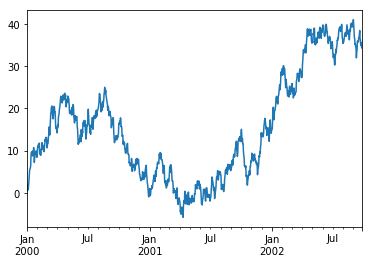

In [194]:
%matplotlib inline
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

データフレームの場合、plot()により簡単に全てのコラムをラベルと共にグラフ表示できます。

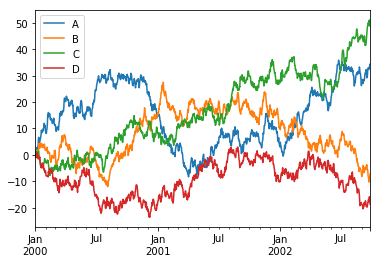

In [196]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

# データの入出力
### CSV
[Writing to a csv file](https://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv).

In [197]:
df.to_csv('foo.csv')

In [198]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.154706,-0.060075,-0.203504,-0.815337
1,2000-01-02,-0.870487,0.835744,1.050080,-0.506594
2,2000-01-03,0.371501,1.524442,-0.621150,-0.666120
3,2000-01-04,1.493495,0.890769,1.263293,-0.047958
4,2000-01-05,2.532939,0.904475,0.844214,-0.912442
5,2000-01-06,2.195014,1.581366,0.310124,-1.122016
6,2000-01-07,2.830326,1.870079,-0.456010,0.855891
7,2000-01-08,1.809257,1.726105,-0.402068,0.269554
8,2000-01-09,2.373136,1.273628,0.654795,-0.576437
9,2000-01-10,5.449404,0.650808,1.447183,-1.571929


### HDF5
[HDFStores](https://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)への読み書き

HDF5への書き込み

※エラーが出る場合には、

linuxの場合：
```
sudo apt-get install python3-tables
```
conda等を利用している場合：
```
conda install -c conda-forge pytables
```

を実行して下さい。

In [200]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store:

In [201]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.154706,-0.060075,-0.203504,-0.815337
2000-01-02,-0.870487,0.835744,1.050080,-0.506594
2000-01-03,0.371501,1.524442,-0.621150,-0.666120
2000-01-04,1.493495,0.890769,1.263293,-0.047958
2000-01-05,2.532939,0.904475,0.844214,-0.912442
2000-01-06,2.195014,1.581366,0.310124,-1.122016
2000-01-07,2.830326,1.870079,-0.456010,0.855891
2000-01-08,1.809257,1.726105,-0.402068,0.269554
2000-01-09,2.373136,1.273628,0.654795,-0.576437
2000-01-10,5.449404,0.650808,1.447183,-1.571929


### Excel
[MS Excel](https://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)の読み書き

エクセルファイルへの書き込み

エラーが出るときは、
pip install openpyxl　xlrd

anaconda を利用している場合：
conda install openpyxl　xlrd

でopenpyxl及びxlrdをインストールして下さい。


In [203]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file:

In [205]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,0.154706,-0.060075,-0.203504,-0.815337
2000-01-02,-0.870487,0.835744,1.050080,-0.506594
2000-01-03,0.371501,1.524442,-0.621150,-0.666120
2000-01-04,1.493495,0.890769,1.263293,-0.047958
2000-01-05,2.532939,0.904475,0.844214,-0.912442
2000-01-06,2.195014,1.581366,0.310124,-1.122016
2000-01-07,2.830326,1.870079,-0.456010,0.855891
2000-01-08,1.809257,1.726105,-0.402068,0.269554
2000-01-09,2.373136,1.273628,0.654795,-0.576437
2000-01-10,5.449404,0.650808,1.447183,-1.571929


# わかった！
以下のようにプログラムを実行してエラー（例外）が出る場合には、

In [206]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

[ Comparisons](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) あるいは、

 [Gotchas](https://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) を見てみましょう。

In [207]:
if pd.Series([False, True, False]).any():
    print("I was true")

I was true
